<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/%C3%81rvore%20de%20decis%C3%A3o%20regress%C3%A3o%20-%20Profissao_Cientista_de_mod%2011%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Tradução:

1. **longitude** - Longitude
2. **latitude** - Latitude
3. **housing_median_age** - Idade mediana das habitações
4. **total_rooms** - Total de cômodos
5. **total_bedrooms** - Total de quartos
6. **population** - População
7. **households** - Número de domicílios
8. **median_income** - Renda mediana
9. **median_house_value** - Valor mediano das casas
10. **ocean_proximity** - Proximidade do oceano


In [2]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.rename(columns={
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'housing_median_age': 'Idade mediana das habitações',
    'total_rooms': 'Total de cômodos',
    'total_bedrooms': 'Total de quartos',
    'population': 'População',
    'households': 'Número de domicílios',
    'median_income': 'Renda mediana',
    'median_house_value': 'Valor mediano das casas',
    'ocean_proximity': 'Proximidade do oceano'
}, inplace=True)


# Separar recursos e rótulos
X = df.drop('Valor mediano das casas', axis=1)
y = df['Valor mediano das casas']
df.head(5)

,Longitude,Latitude,Idade mediana das habitações,Total de cômodos,Total de quartos,População,Número de domicílios,Renda mediana,Valor mediano das casas,Proximidade do oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


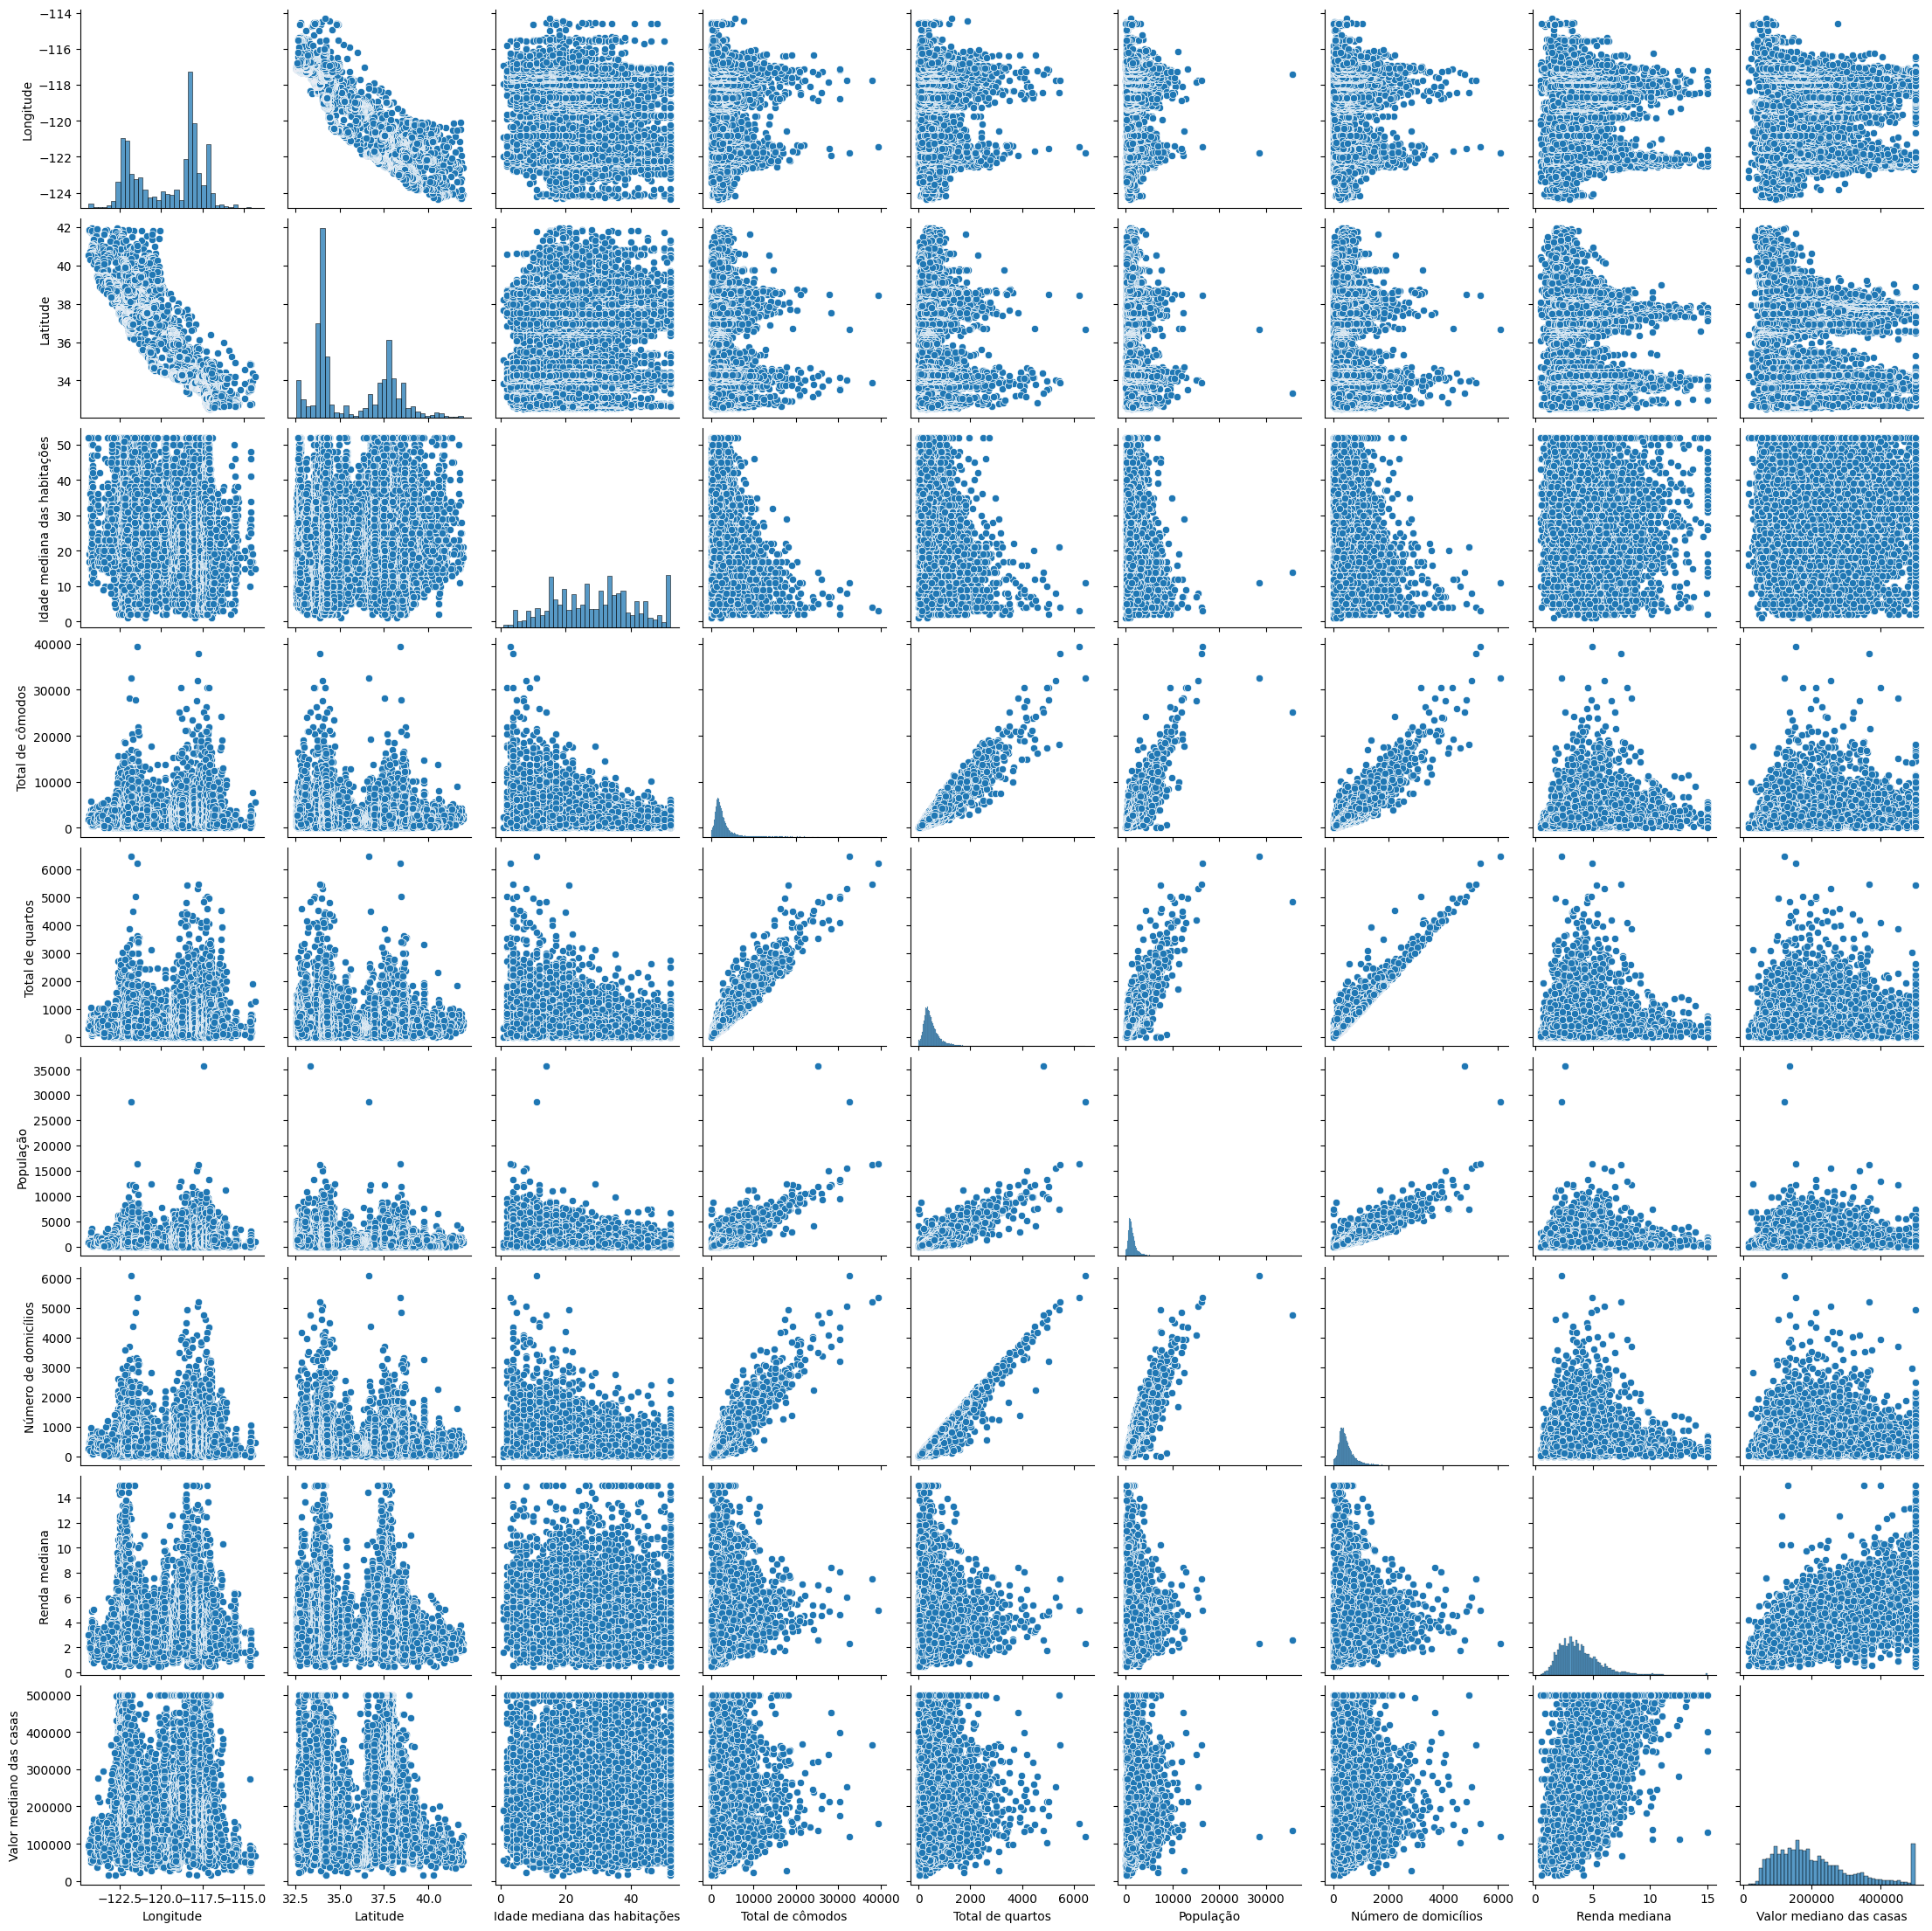

<Figure size 1000x800 with 0 Axes>

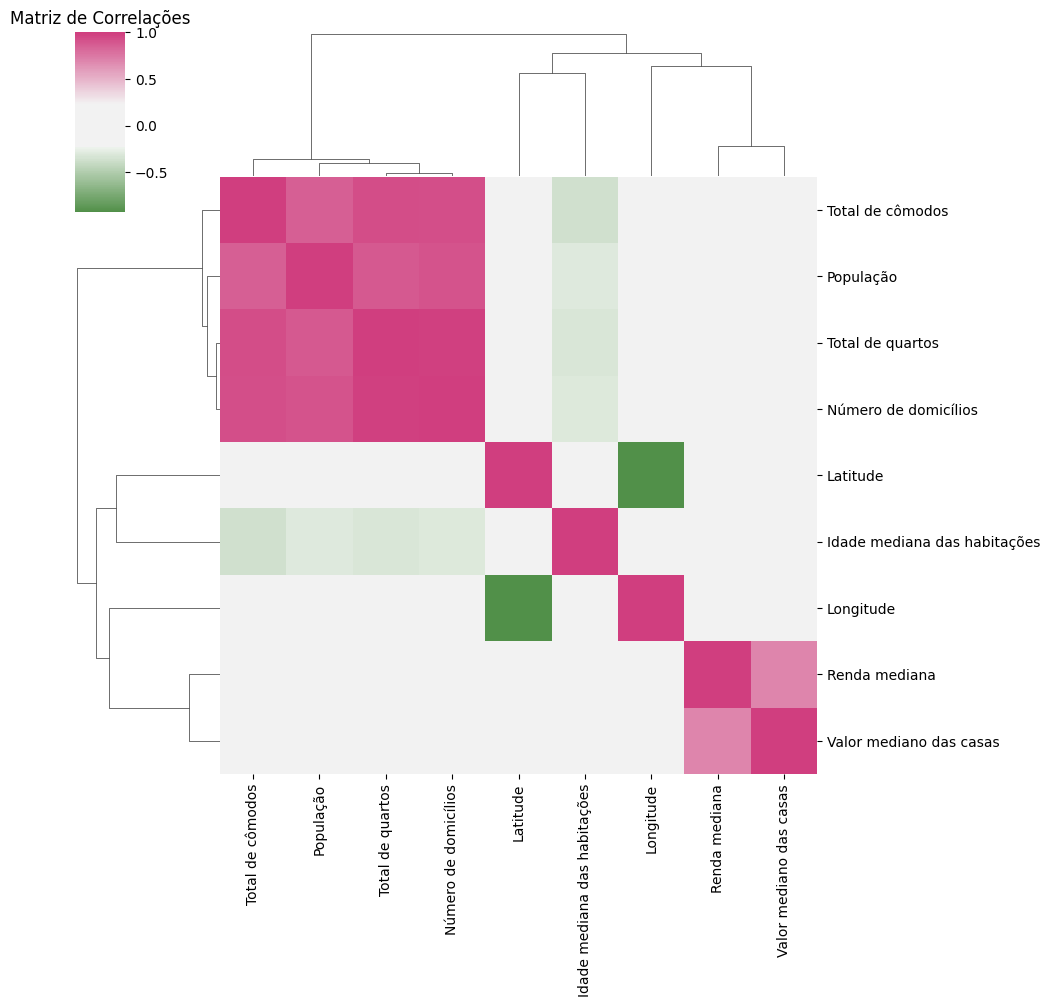

In [4]:
# Plotando a matriz de dispersão para avaliação das correlações entre as variáveis
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
matriz = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = matriz.corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(correlation_matrix, figsize=(10, 10), center = 0, cmap=cmap)
plt.title('Matriz de Correlações')
plt.show()

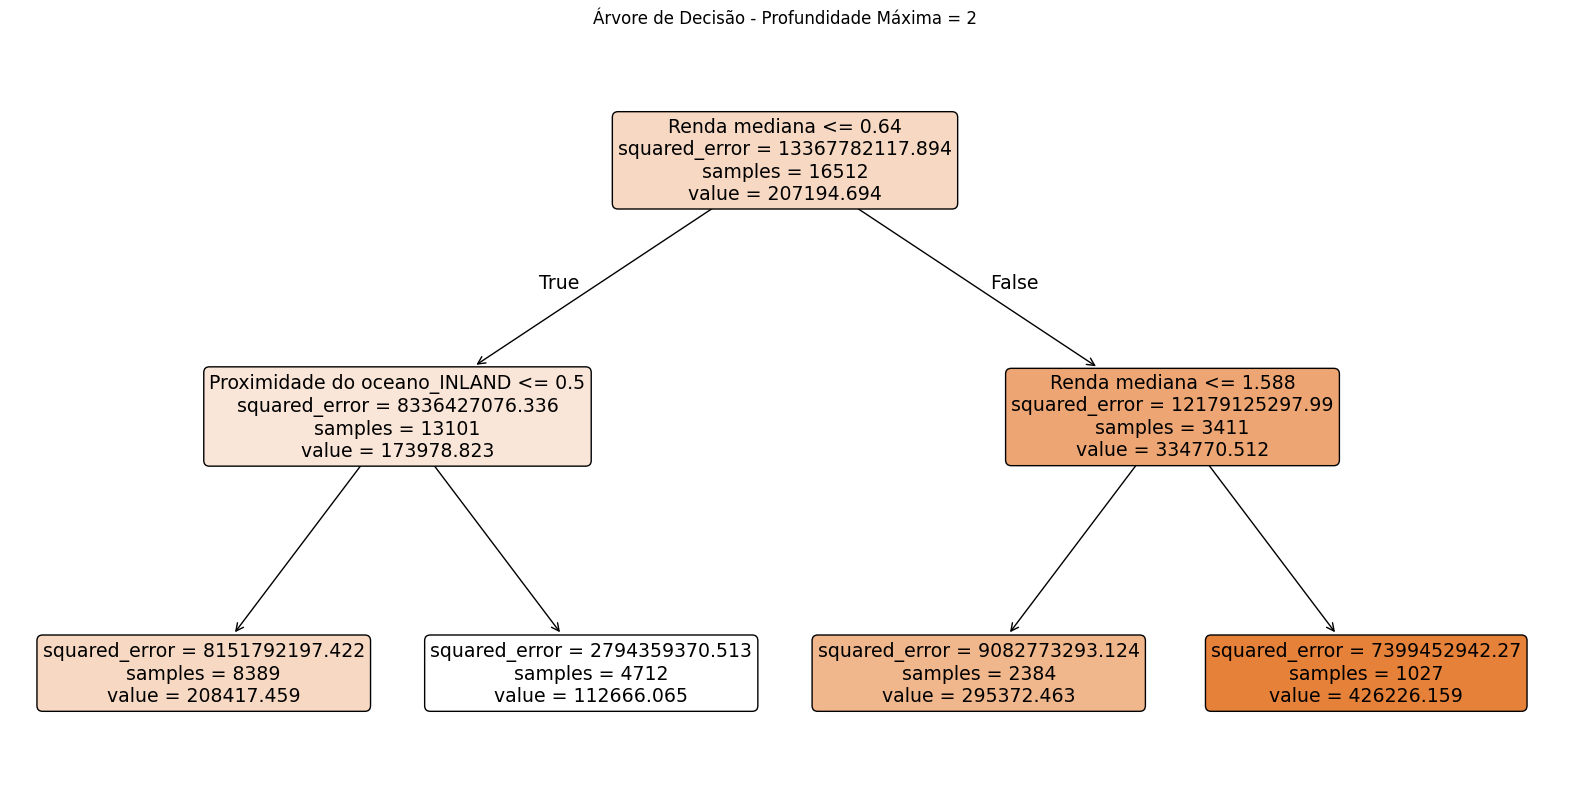

In [5]:
# Separar recursos e rótulos
X = df.drop('Valor mediano das casas', axis=1)
y = df['Valor mediano das casas']

# Identificar colunas numéricas e categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['Proximidade do oceano']

# Criar um pipeline de pré-processamento
preprocessor = ColumnTransformer(
   transformers=[
       ('num', Pipeline(steps=[
           ('imputer', SimpleImputer(strategy='mean')),
           ('scaler', StandardScaler())
       ]), num_features),
       ('cat', OneHotEncoder(), cat_features)
   ])

# Transformar os dados
X_processed = preprocessor.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Se você precisar dos nomes das colunas transformadas:
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
feature_names = list(num_feature_names) + list(cat_feature_names)

# Exemplo de plotagem de árvore de decisão (se estiver usando modelos de árvore)
# A parte abaixo será útil na visualização da árvore
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Exemplo de ajuste de modelo
model = DecisionTreeRegressor(max_depth=2)
model.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=feature_names, filled=True, rounded=True)
plt.title("Árvore de Decisão - Profundidade Máxima = 2")
plt.show()

In [8]:
from sklearn.tree import DecisionTreeRegressor


# Criar os modelos com diferentes profundidades
model_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
model_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

# Treinar os modelos
model_depth_8.fit(X_train, y_train)
model_depth_2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_depth_8 = model_depth_8.predict(X_test)
y_pred_depth_2 = model_depth_2.predict(X_test)

# Avaliar os modelos
mse_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
r2_depth_8 = r2_score(y_test, y_pred_depth_8)

mse_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
r2_depth_2 = r2_score(y_test, y_pred_depth_2)

# Resultados
print("Modelo com profundidade máxima = 8")
print(f"Mean Squared Error: {mse_depth_8:.2f}")
print(f"R² Score: {r2_depth_8:.2f}\n")

print("Modelo com profundidade máxima = 2")
print(f"Mean Squared Error: {mse_depth_2:.2f}")
print(f"R² Score: {r2_depth_2:.2f}")

Modelo com profundidade máxima = 8
Mean Squared Error: 3902554380.24
R² Score: 0.70

Modelo com profundidade máxima = 2
Mean Squared Error: 6893607949.70
R² Score: 0.47


In [9]:
y_pred_depth_8 = model_depth_8.predict(X_test)
y_pred_depth_2 = model_depth_2.predict(X_test)

In [10]:
# Avaliar os modelos
mse_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
r2_depth_8 = r2_score(y_test, y_pred_depth_8)

mse_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
r2_depth_2 = r2_score(y_test, y_pred_depth_2)

In [11]:
# Resultados
print("Modelo com profundidade máxima = 8")
print(f"Mean Squared Error: {mse_depth_8:.2f}")
print(f"R² Score: {r2_depth_8:.2f}\n")

print("Modelo com profundidade máxima = 2")
print(f"Mean Squared Error: {mse_depth_2:.2f}")
print(f"R² Score: {r2_depth_2:.2f}")

Modelo com profundidade máxima = 8
Mean Squared Error: 3902554380.24
R² Score: 0.70

Modelo com profundidade máxima = 2
Mean Squared Error: 6893607949.70
R² Score: 0.47


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validação cruzada com 5 folds
cv_scores_depth_8 = cross_val_score(model_depth_8, X_processed, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_depth_2 = cross_val_score(model_depth_2, X_processed, y, cv=5, scoring='neg_mean_squared_error')

# Converter os scores para positivos
cv_scores_depth_8 = -cv_scores_depth_8
cv_scores_depth_2 = -cv_scores_depth_2

# Resultados
print("Modelo com profundidade máxima = 8")
print(f"MSE médio na validação cruzada: {np.mean(cv_scores_depth_8):.2f}")

print("\nModelo com profundidade máxima = 2")
print(f"MSE médio na validação cruzada: {np.mean(cv_scores_depth_2):.2f}")

Modelo com profundidade máxima = 8
MSE médio na validação cruzada: 7406851535.90

Modelo com profundidade máxima = 2
MSE médio na validação cruzada: 7244121149.43


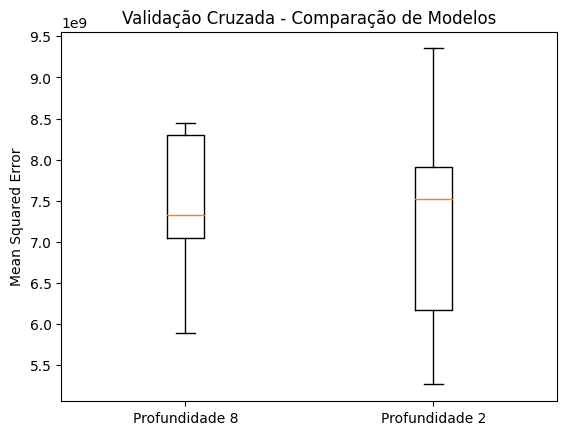

In [13]:
plt.boxplot([cv_scores_depth_8, cv_scores_depth_2], labels=['Profundidade 8', 'Profundidade 2'])
plt.ylabel('Mean Squared Error')
plt.title('Validação Cruzada - Comparação de Modelos')
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [14]:
path = model_depth_8.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.61900436e+03, 1.89256298e+04, 4.34959423e+04,
        6.97674419e+04, 8.09378028e+04, 8.21950703e+04, 1.24876112e+05,
        1.44381460e+05, 1.48270349e+05, 1.60803507e+05, 1.66409884e+05,
        2.15752431e+05, 2.31838966e+05, 2.52402255e+05, 2.73801781e+05,
        3.03281977e+05, 3.08155827e+05, 3.42858829e+05, 3.79792125e+05,
        4.13135190e+05, 4.14396923e+05, 4.16817897e+05, 4.28366663e+05,
        4.36782386e+05, 4.50270854e+05, 4.64195762e+05, 4.97279215e+05,
        5.00268654e+05, 5.26396798e+05, 5.37065872e+05, 5.39635429e+05,
        5.45288746e+05, 5.51932325e+05, 5.67514838e+05, 5.97909547e+05,
        6.63441876e+05, 6.68928173e+05, 6.72070214e+05, 6.74873117e+05,
        6.77602406e+05, 6.98352878e+05, 7.12728292e+05, 7.42299235e+05,
        7.65388778e+05, 7.75007377e+05, 7.75669221e+05, 7.79389356e+05,
        8.47884672e+05, 8.62074913e+05, 8.63384824e+05, 8.63576490e+05,
        9.48713462e+05, 9.50674322e+05, 9.85359008

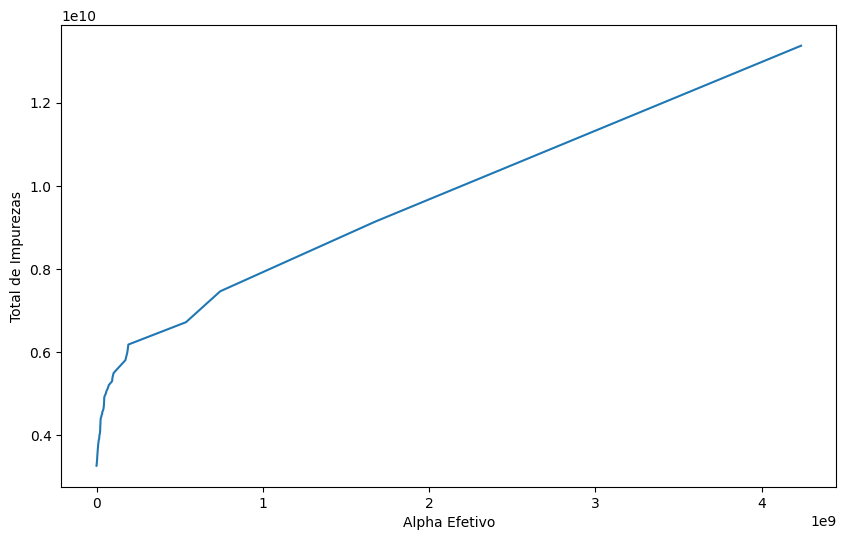

In [15]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha Efetivo")
plt.ylabel("Total de Impurezas")
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [16]:
arvores = []  # Lista para armazenar as árvores

# Treine uma árvore para cada valor de alpha
for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(ccp_alpha=alpha)  # Usando o regressor
    arvore.fit(X_train, y_train)
    arvores.append(arvore)  # Armazena a árvore na lista

### 4. Para cada árvore na lista, calcule o MSE da árvore.

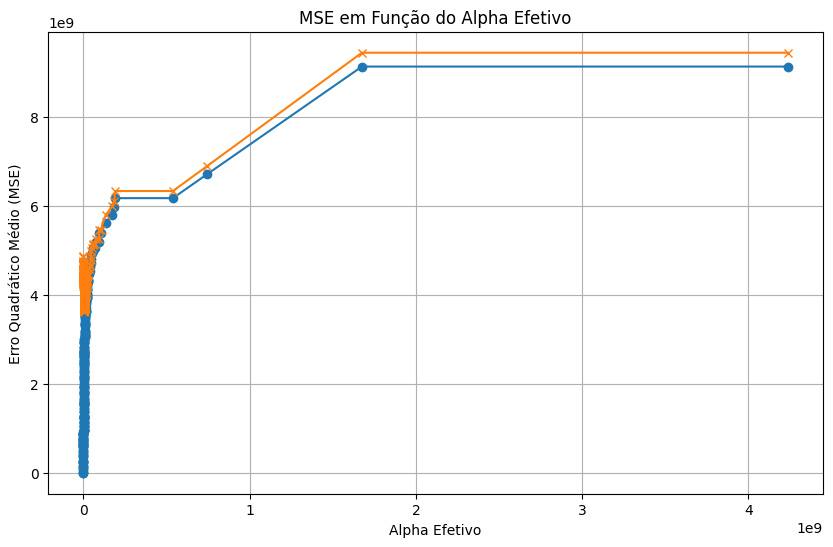

In [17]:
# Calculo do MSE do banco de dados de treino e de teste.
mse_list = [mean_squared_error(y_train, clf.predict(X_train)) for clf in arvores]
test_MSE = [mean_squared_error(y_test , clf.predict(X_test )) for clf in arvores]
# Plot do MSE em relação ao alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o')
plt.plot(ccp_alphas, test_MSE, marker='x')
plt.xlabel("Alpha Efetivo")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE em Função do Alpha Efetivo")
plt.grid(True)
plt.show()

In [18]:
# Encontrar o valor de alpha com o MSE mínimo
min_mse_index = np.argmin(mse_list)
alpha_otimo = ccp_alphas[min_mse_index]
mse_otimo = mse_list[min_mse_index]

print(f"Valor de alpha ótimo: {alpha_otimo}")
print(f"MSE mínimo: {mse_otimo}")

Valor de alpha ótimo: 0.0
MSE mínimo: 0.0


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

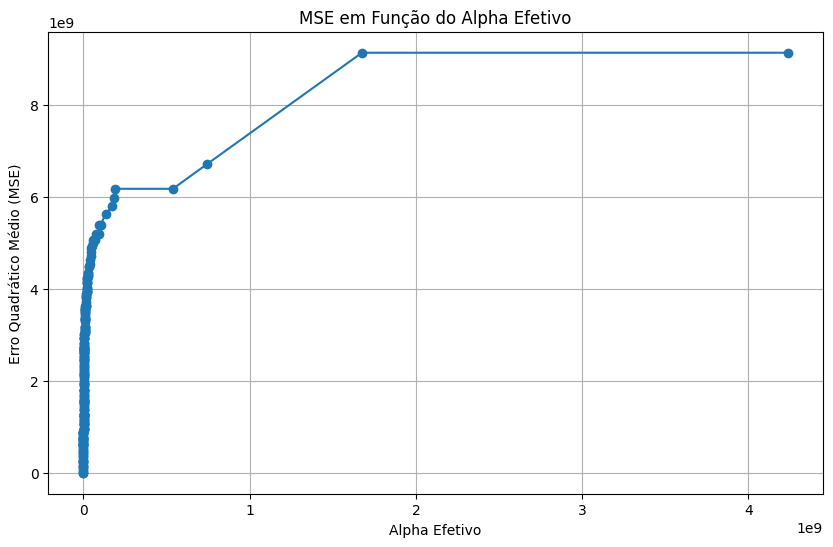

Valor de alpha ótimo: 0.0
MSE mínimo: 0.0


In [21]:
# Plot do MSE em relação ao alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o')
plt.xlabel("Alpha Efetivo")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE em Função do Alpha Efetivo")
plt.grid(True)
plt.show()

# Encontrar o valor de alpha com o MSE mínimo
min_mse_index = np.argmin(mse_list)
alpha_otimo = ccp_alphas[min_mse_index]
mse_otimo = mse_list[min_mse_index]

print(f"Valor de alpha ótimo: {alpha_otimo}")
print(f"MSE mínimo: {mse_otimo}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [ ]:
# Usar a árvore com o valor de alpha ótimo
arvore_otima = DecisionTreeRegressor(ccp_alpha=alpha_otimo)
arvore_otima.fit(X_train, y_train)  # Treinando novamente com os dados
y_pred_otima = arvore_otima.predict(X_train)  # Faz previsões

# Calcular o R-quadrado
r2 = r2_score(y_train, y_pred_otima)

print(f"R-quadrado da árvore com alpha ótimo ({alpha_otimo}): {r2}")

R-quadrado da árvore com alpha ótimo (0.0): 1.0


### 7. Visualize esta árvore.

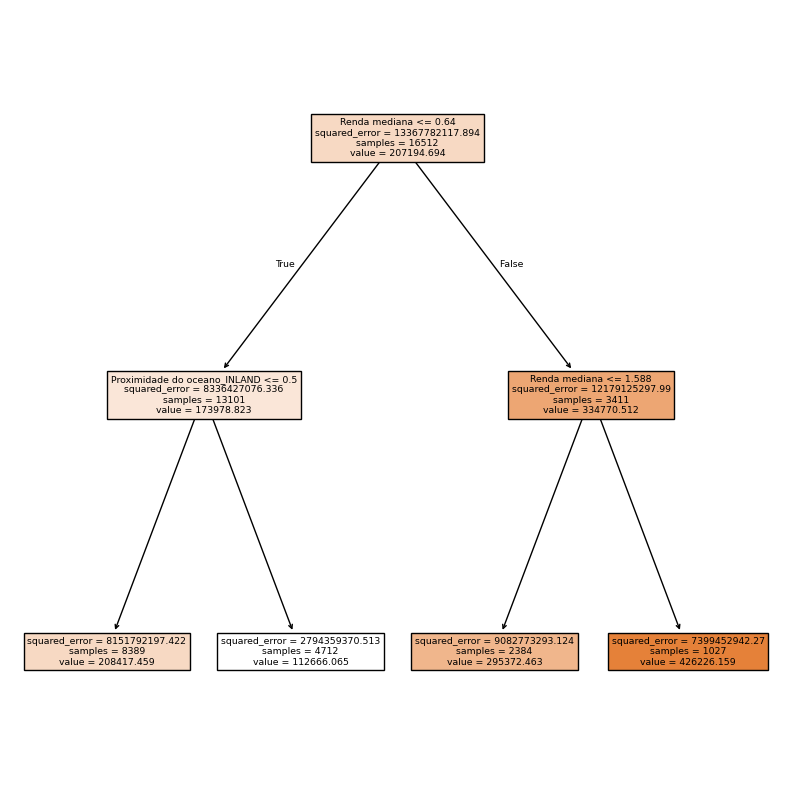

In [20]:
# Criando árvore regressiva com ccp_alpha=1.6 e treinando a árvore.
arvore_final = DecisionTreeRegressor(max_depth=2, random_state=123, ccp_alpha=1.6)
arvore_final.fit(X_train, y_train)

# Tamanho da Figura.
plt.rc('figure', figsize=(10,10))

# Plotando a Árvore de Regressão através do tree.plot_tree().
tree.plot_tree(arvore_final, # Árvore utilizada.
               feature_names=feature_names, # nome das Colunas.
               filled=True) # Colorir a árvore.

plt.show() # Exibir a árvore.